In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

<b> Creating function for loading image needed frequently </b>

In [3]:
def load_img():
    img = cv.imread("DATA/bricks.jpg").astype(np.float32) / 255
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

In [4]:
def show_img(img):
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

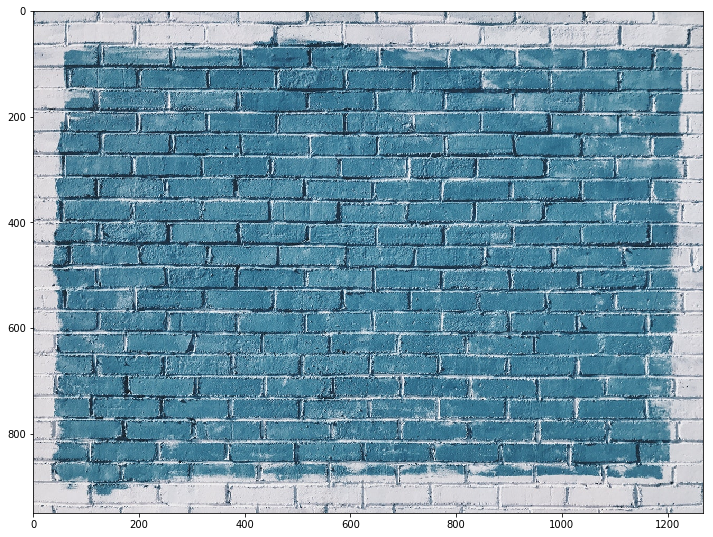

In [7]:
i = load_img()
show_img(i)

<h4> Gamma Correction </h4>
We can brighten or darken the image by changing the gamma of the image
Its just a value to which <b>each pixel of the image is powered.</b>
Power less than 1 means brighten and greater than 1 means darken the image

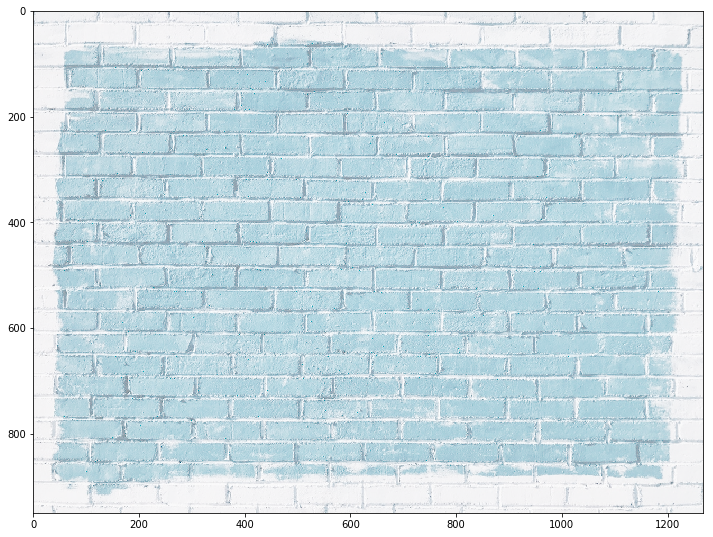

In [13]:
gamma = 1/4
result = np.power(i, gamma)
show_img(result)

<h3> Write some text on the image to demonstrate blur better </h3>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


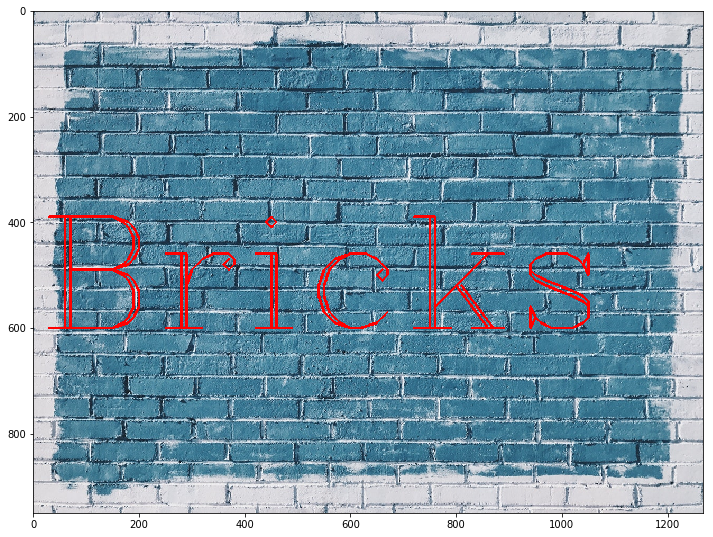

In [15]:
img = load_img()
font = cv.FONT_HERSHEY_COMPLEX
img = cv.putText(img,"Bricks",org=(10, 600),fontFace=font,fontScale=10,color=(255,0,0),thickness=4)
show_img(img)

<h3> Creating the Kernel </h3>
Also called a filter which is matrix of odd size and the sum of its elements should be 1.
this matrix is multiplied with each pixel and added which determines the new pixel value and hence smoothens the picture

In [16]:
kernel = np.ones(shape = (5,5), dtype = np.float32)/25

In [17]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


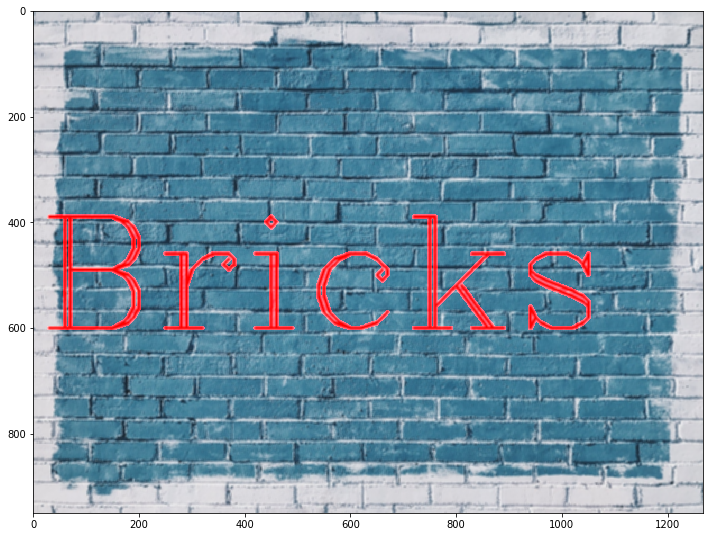

In [18]:
# Applying the kernel to the image
# here ddpeth = -1 specifies that the depth is same as that of the input image
# depth means the datatype and the number of bits
dst = cv.filter2D(img, -1, kernel)
show_img(dst)

In [19]:
#Loading the image again
img = load_img()
font = cv.FONT_HERSHEY_COMPLEX
img = cv.putText(img,"Bricks",org=(10, 600),fontFace=font,fontScale=10,color=(255,0,0),thickness=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


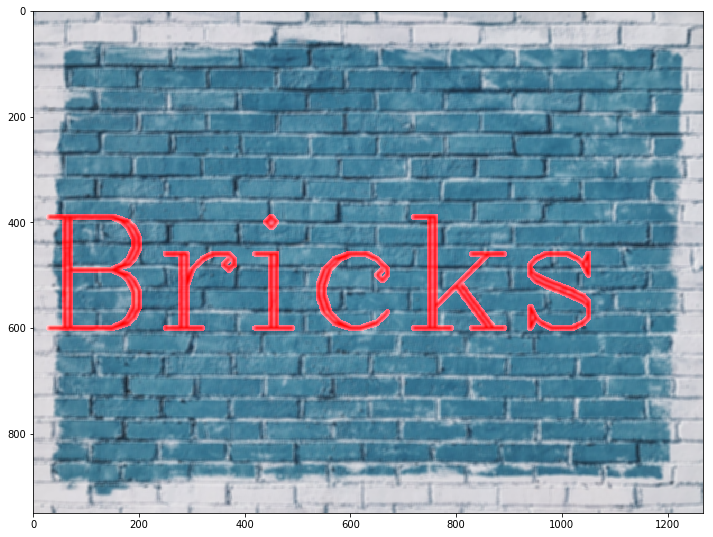

In [22]:
# Using the blur method
blurred_img = cv.blur(img, ksize=(7,7))
show_img(blurred_img)

In [23]:
#Loading the image again
img = load_img()
font = cv.FONT_HERSHEY_COMPLEX
img = cv.putText(img,"Bricks",org=(10, 600),fontFace=font,fontScale=10,color=(255,0,0),thickness=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


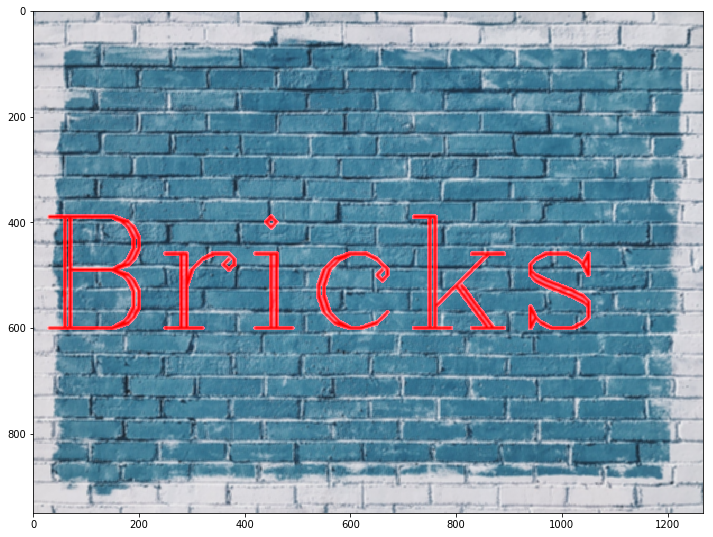

In [24]:
# the third parameter is the sigmaX (standard deviation)
blurred_img = cv.GaussianBlur(img, (5,5), 10)
show_img(blurred_img)

In [25]:
#Loading the image again
img = load_img()
font = cv.FONT_HERSHEY_COMPLEX
img = cv.putText(img,"Bricks",org=(10, 600),fontFace=font,fontScale=10,color=(255,0,0),thickness=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


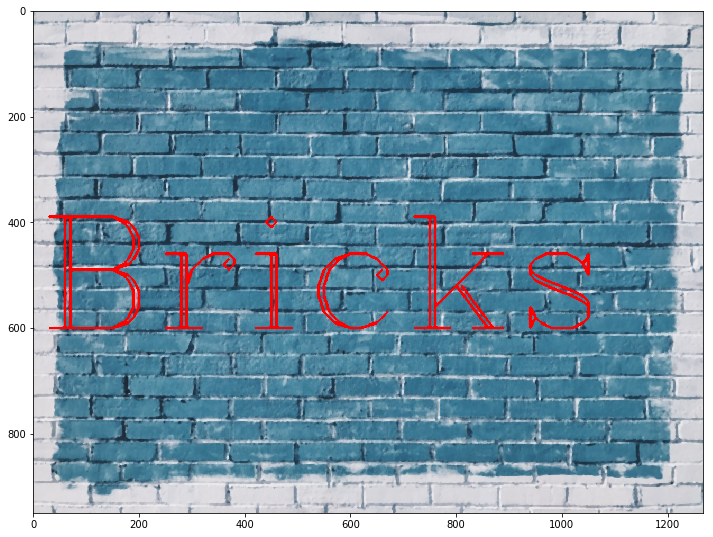

In [26]:
median_blur = cv.medianBlur(img, ksize=5)
show_img(median_blur)

<h3> Median Blur is a bit different than others in that it tries to preserve the details and reduce the noise </h3>

<h3>--------------------------------------------------------------------</h3>
<h2> Lets try reducing the noise of a real image </h2>

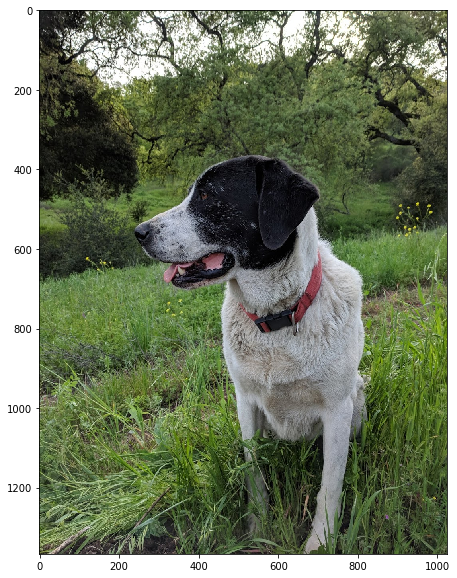

In [28]:
img = cv.imread("DATA/sammy.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
show_img(img)

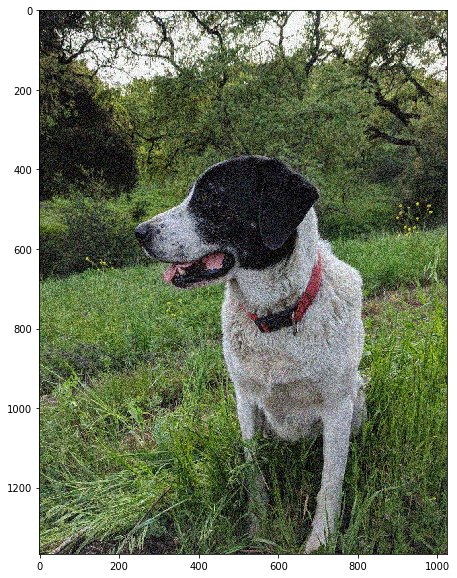

In [29]:
img = cv.imread("DATA/sammy_noise.jpg")
show_img(img)

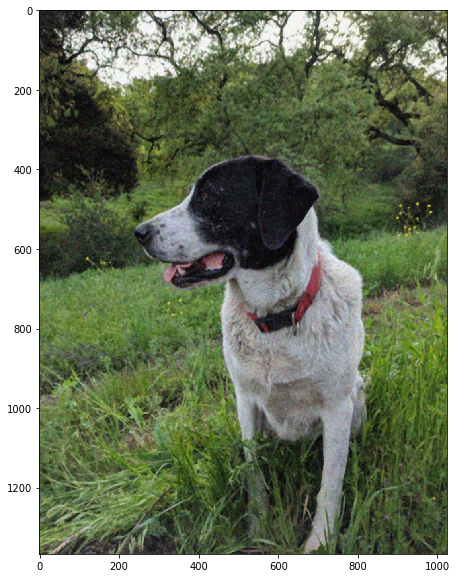

In [30]:
blurred = cv.medianBlur(img, ksize = 5)
show_img(blurred)

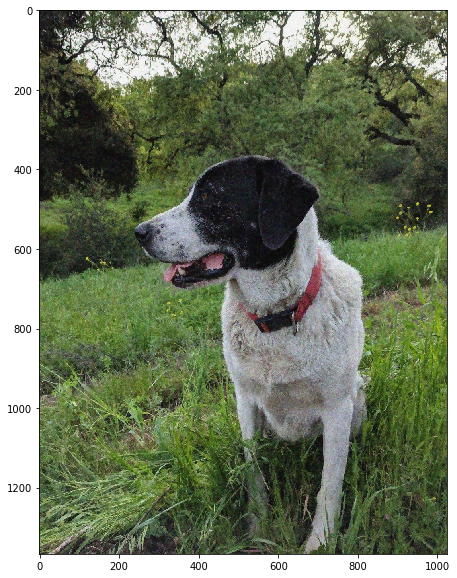

In [31]:
# Slower filter compared to other filters 
# tries to preserve details like medianBlur
bil_blur = cv.bilateralFilter(img, 9, 75, 75)
show_img(bil_blur)